# Ticker pour poliniex
Ressource : https://stackoverflow.com/questions/32154121/how-to-connect-to-poloniex-com-websocket-api-using-a-python-library
>* 1001 = trollbox (you will get nothing but a heartbeat)
* 1002 = ticker
* 1003 = base coin 24h volume stats
* 1010 = heartbeat
* 'MARKET_PAIR' = market order books  

Sample :  
>`{"BTC_LTC":{"last":"0.0251","lowestAsk":"0.02589999","highestBid":"0.0251","percentChange":"0.02390438",
"baseVolume":"6.16485315","quoteVolume":"245.82513926"},"BTC_NXT":{"last":"0.00005730","lowestAsk":"0.00005710",
"highestBid":"0.00004903","percentChange":"0.16701570","baseVolume":"0.45347489","quoteVolume":"9094"}, ... }`

In [8]:
import urllib
from urllib import request
import json
import datetime

def getTicker():
    currentTime = datetime.datetime.now()
    urlTicker = urllib.request.urlopen('https://poloniex.com/public?command=returnTicker')
    rawTicker = urlTicker.read()
    data = json.loads(rawTicker)
    return {'currentTime':currentTime, 'quote':data}    

In [25]:
import pandas as pd
test = getTicker()['quote']
df = pd.DataFrame(test)

In [26]:
df.to_csv('test_ticker.csv')
df

,BTC_AMP,BTC_ARDR,BTC_BCH,BTC_BCN,BTC_BCY,BTC_BELA,BTC_BLK,BTC_BTCD,BTC_BTM,BTC_BTS,...,USDT_XRP,USDT_ZEC,XMR_BCN,XMR_BLK,XMR_BTCD,XMR_DASH,XMR_LTC,XMR_MAID,XMR_NXT,XMR_ZEC
baseVolume,25.31893848,25.56776650,837.04734014,22.61156190,3.97805655,44.71855866,16.23488066,3.14147118,1.17792238,269.95391357,...,691243.27126481,620067.10246089,4.42029475,2.91499263,2.06358737,88.52056810,117.13872216,2.95472218,7.23092297,112.87140035
high24hr,0.00003972,0.00003300,0.11608854,0.00000034,0.00009724,0.00004350,0.00004900,0.02298000,0.00013998,0.00002038,...,0.18000000,208.86907885,0.00001364,0.00200699,0.94828927,4.01700000,0.55030982,0.00543408,0.00068510,2.31320000
highestBid,0.00003809,0.00003221,0.11466000,0.00000032,0.00009665,0.00004121,0.00004743,0.02274350,0.00013393,0.00001984,...,0.17540064,205.52173086,0.00001308,0.00197031,0.92402960,3.68843839,0.52936145,0.00528925,0.00066558,2.30564089
id,160,177,189,7,151,8,10,12,13,14,...,127,180,129,130,131,132,137,138,140,181
isFrozen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
last,0.00003809,0.00003228,0.11465401,0.00000032,0.00009708,0.00004165,0.00004752,0.02274350,0.00013393,0.00001984,...,0.17540064,205.52173063,0.00001310,0.00197031,0.92877106,3.70551926,0.52971283,0.00528792,0.00066354,2.31320000
low24hr,0.00003722,0.00003151,0.11390406,0.00000032,0.00009300,0.00003367,0.00004664,0.02209326,0.00013250,0.00001940,...,0.17264629,198.20000001,0.00001290,0.00191708,0.91523003,3.68280285,0.52050627,0.00504653,0.00065383,2.20677324
lowestAsk,0.00003811,0.00003228,0.11508316,0.00000033,0.00009707,0.00004165,0.00004785,0.02275781,0.00013449,0.00001990,...,0.17540065,206.88021566,0.00001329,0.00200920,0.93594765,3.71051091,0.53372049,0.00531242,0.00066821,2.31320000
percentChange,-0.01193255,-0.01973883,0.00749279,-0.03030303,0.00946241,0.20202020,-0.00689655,0.02237873,-0.02603447,-0.00899100,...,-0.01311861,0.00717651,-0.03392330,0.00890978,0.01479522,-0.02239768,-0.01259526,0.00267358,-0.01941833,0.03730941
quoteVolume,658313.08333889,797786.01918476,7279.29190795,68693291.02976783,42043.61661418,1128685.69645096,339409.27808188,140.08656363,8649.84902198,13608387.58859304,...,3933332.50038952,3061.54651957,330370.17023826,1491.13270551,2.21786116,22.88529491,215.99113982,554.34555239,10798.08289215,50.56519196


In [24]:
list_of_currency_pairs=df.columns


Index(['BTC_AMP', 'BTC_ARDR', 'BTC_BCH', 'BTC_BCN', 'BTC_BCY', 'BTC_BELA',
       'BTC_BLK', 'BTC_BTCD', 'BTC_BTM', 'BTC_BTS',
       ...
       'USDT_XRP', 'USDT_ZEC', 'XMR_BCN', 'XMR_BLK', 'XMR_BTCD', 'XMR_DASH',
       'XMR_LTC', 'XMR_MAID', 'XMR_NXT', 'XMR_ZEC'],
      dtype='object', length=101)

In [6]:
import time
import pylab as pl
from IPython import display

# Problemes a regler
#    - xlabel, je voudrais 3 ou 4 timestamp de format HH:MM:SS
#    - ylabel, la graduation n'est pas claire (ex: 1e-8+7.2553e-2)
#    - periode de rafraichissement pas terrible
#    - changement de couleur a chaque nouveau plot
#    - 

def plotTicker(currencyPair):
    
    hBidList = []
    unixTime = []
    
    def init():
        ticker = getTicker(currencyPair)
        hBid = float(ticker['quote']['highestBid'])
        hBidList.append(hBid)
        unixTime.append(ticker['currentTime'])
        time.sleep(1)
        
    for i in range(2):
        init()
        
    while True:
        try:
            init()
            display.clear_output(wait=True)
            pl.plot(unixTime, hBidList)
            pl.xticks([unixTime[0], unixTime[-1]])

            display.display(pl.gcf())
            time.sleep(1)
                
        except KeyboardInterrupt:
            break

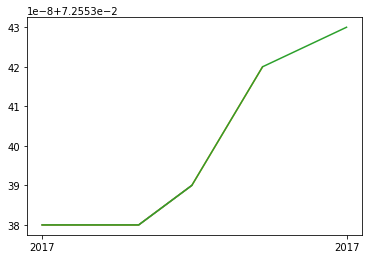

In [4]:
plotTicker("BTC_ETH")